In [78]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Reference Selection
### Select 1 Refseq accession per family

In [30]:
refseq_df = pd.read_csv('../NCBI/RefSeq/plastid_raw_SeqID_wcvp.csv')
print(refseq_df.shape[0],refseq_df.sci_name.nunique(),refseq_df.family.nunique())
# refseq_df = pd.merge(refseq_df,
#                 pd.read_csv('../../Taxonomy/apg4plus.csv')[['Order','Family']].rename(columns={'Order':'order','Family':'family'}),
#                 how='inner',on='family')
# print(refseq_df.shape[0],refseq_df.sci_name.nunique(),refseq_df.family.nunique(),refseq_df.order.nunique())
refseq_df.head(2)

6593 6425 314


,SeqID,Ini_sci_name,TaxID,mol_type,seq_len,Sample_Name,sci_name_query,Similar_match,Duplicates,kew_id,...,infraspecies,sci_name,authors,rank,taxonomic_status,publication,original_name_id,Ini_kew_id,Ini_taxonomic_status,Duplicate_type
0,AC_000188,Solanum lycopersicum,4081,genomic DNA,155461,AC_000188.1,Solanum lycopersicum,NaN,False,316947-2,...,NaN,Solanum lycopersicum,L.,SPECIES,Accepted,Sp. Pl.: 185 (1753),NaN,NaN,NaN,NaN
1,NC_000932,Arabidopsis thaliana,3702,genomic DNA,154478,NC_000932.1,Arabidopsis thaliana,NaN,False,277970-1,...,NaN,Arabidopsis thaliana,(L.) Heynh.,SPECIES,Accepted,"F.Holl & H.Heynhold, Fl. Sachsen: 538 (1842)",278687-1,NaN,NaN,NaN


In [31]:
refseq_sp = pd.read_csv('../NCBI/RefSeq/refseq_sp.csv')
print(refseq_sp.shape[0],refseq_sp.sci_name.nunique(),refseq_sp.family.nunique(),refseq_sp.order.nunique())
refseq_sp.head(2)

6065 6065 283 58


,SeqID,Ini_sci_name,TaxID,mol_type,seq_len,Sample_Name,sci_name_query,Similar_match,Duplicates,kew_id,...,sci_name,authors,rank,taxonomic_status,publication,original_name_id,Ini_kew_id,Ini_taxonomic_status,Duplicate_type,order
0,NC_031206,Pelargonium transvaalense,158603,genomic DNA,242575,NC_031206.1,Pelargonium transvaalense,NaN,False,377111-1,...,Pelargonium transvaalense,R.Knuth,SPECIES,Accepted,"H.G.A.Engler (ed.), Pflanzenr., IV, 129: 434 (...",NaN,NaN,NaN,NaN,Geraniales
1,NC_056348,Vitis romanetii,882115,genomic DNA,232020,NC_056348.1,Vitis romanetii,NaN,False,69010-1,...,Vitis romanetii,Rom.Caill.,SPECIES,Accepted,Rev. Hort. (Paris) 55: 53 (1883),NaN,NaN,NaN,NaN,Vitales


In [32]:
refseq_df[refseq_df.family.isin(refseq_sp.family)==False].family.unique()

array(['Pinaceae', 'Psilotaceae', 'Pteridaceae', 'Lycopodiaceae',
       'Marattiaceae', 'Cycadaceae', 'Cupressaceae', 'Welwitschiaceae',
       'Gnetaceae', 'Ephedraceae', 'Cyatheaceae', 'Selaginellaceae',
       'Dennstaedtiaceae', 'Isoetaceae', 'Equisetaceae', 'Taxaceae',
       'Ginkgoaceae', 'Ophioglossaceae', 'Podocarpaceae', nan,
       'Schizaeaceae', 'Marsileaceae', 'Araucariaceae', 'Osmundaceae',
       'Gleicheniaceae', 'Zamiaceae', 'Polypodiaceae', 'Aspleniaceae',
       'Sciadopityaceae', 'Hymenophyllaceae', 'Lindsaeaceae',
       'Saccolomataceae'], dtype=object)

In [33]:
refseq_df[refseq_df.family=='Marsileaceae']

,SeqID,Ini_sci_name,TaxID,mol_type,seq_len,Sample_Name,sci_name_query,Similar_match,Duplicates,kew_id,...,infraspecies,sci_name,authors,rank,taxonomic_status,publication,original_name_id,Ini_kew_id,Ini_taxonomic_status,Duplicate_type
277,NC_022137,Marsilea crenata,388472,genomic DNA,151628,NC_022137.1,Marsilea crenata,NaN,False,17145140-1,...,NaN,Marsilea minuta,L.,SPECIES,Accepted,Mant. Pl.: 308 (1771),NaN,17274610-1,Synonym,NaN


In [69]:
def get_qualifier(feature, qualifier):
    try:
        return feature.qualifiers[qualifier][0]
    except:
        return np.nan
def get_features(gb_file):
    seq_dc=[]
    for rec in SeqIO.parse(gb_file, "genbank"):
        for feature in rec.features:
            if feature.type not in ['source','misc_feature']:
                feat_dc = {'type':feature.type}
                feat_dc['gene'] = get_qualifier(feature,'gene')
                feat_dc['product'] = get_qualifier(feature,'product')
    #             feat_dc['info'] = get_qualifier(feature,'info')
                if feat_dc['gene'] is np.nan:
                    feat_dc['gene'] = get_qualifier(feature,'note')
                feat_dc['len'] = len(feature.location.extract(rec).seq)
                feat_dc['location'] = str(feature.location)
                feat_dc['seq'] = str(feature.location.extract(rec).seq)
                seq_dc.append(feat_dc)
    return pd.DataFrame(seq_dc)

In [107]:
# get trnh-psba
gene_1 = 'trnH'
for rec in SeqIO.parse(gb_file, "genbank"):
    for feature in rec.features:
        if feature.type not in ['source','misc_feature']:
            if gene_1 in get_qualifier(feature,'gene'):
                print(feature)

type: gene
location: [0:73](-)
qualifiers:
    Key: annotator, Value: ['tRNAscan-SE_v2']
    Key: gene, Value: ['trnH-GUG']
    Key: info, Value: ['annotated by tRNAscan-SE v2.0.7, infernal score: 55.4']

type: tRNA
location: [0:73](-)
qualifiers:
    Key: annotator, Value: ['tRNAscan-SE_v2']
    Key: gene, Value: ['trnH-GUG']
    Key: product, Value: ['tRNA-His']

type: gene
location: join{[0:73](-), [153428:153429](-)}
qualifiers:
    Key: annotator, Value: ['tRNAscan-SE_v2']
    Key: gene, Value: ['trnH-GUG']
    Key: info, Value: ['annotated by tRNAscan-SE v2.0.7, infernal score: 61.9']

type: tRNA
location: join{[0:73](-), [153428:153429](-)}
qualifiers:
    Key: annotator, Value: ['tRNAscan-SE_v2']
    Key: gene, Value: ['trnH-GUG']
    Key: product, Value: ['tRNA-His']

type: gene
location: join{[0:74](-), [153427:153429](-)}
qualifiers:
    Key: annotator, Value: ['ARAGORN']
    Key: gene, Value: ['trnH-GUG']
    Key: info, Value: ['annotated by ARAGORN v1.2.38, score: 115.2']


In [106]:
feature

SeqFeature(CompoundLocation([FeatureLocation(ExactPosition(69683), ExactPosition(69797), strand=-1), FeatureLocation(ExactPosition(97242), ExactPosition(98034), strand=-1)], 'join'), type='gene', location_operator='join')

In [83]:
ref_dir = 'References_gb/'
all_gb_files = [ref_dir + file for file in os.listdir(ref_dir) if file.endswith(".gb")]
# all_gb_files = ['References/NC_003386.1.gb']
print(len(all_gb_files))

All_feat = pd.DataFrame()
for gb_file in all_gb_files:
    # Get features
    seq_df = get_features(gb_file)
    seq_df = seq_df[seq_df.gene.str.contains('-fragment')==False]
    seq_df['Sample_Name'] = gb_file.split('/')[1].replace('.gb','')
    All_feat = pd.concat([All_feat,seq_df],ignore_index=True)

124


C:\ProgramData\Anaconda3\lib\site-packages\Bio\GenBank\__init__.py:359: BiopythonParserWarning: Attempting to fix invalid location '156533..99712' as it looks like incorrect origin wrapping. Please fix input file, this could have unintended behavior.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\Bio\GenBank\__init__.py:359: BiopythonParserWarning: Attempting to fix invalid location '165380..84468' as it looks like incorrect origin wrapping. Please fix input file, this could have unintended behavior.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\Bio\GenBank\__init__.py:359: BiopythonParserWarning: Attempting to fix invalid location '159887..87141' as it looks like incorrect origin wrapping. Please fix input file, this could have unintended behavior.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\Bio\GenBank\__init__.py:359: BiopythonParserWarning: Attempting to fix invalid location '161640..88578' as it looks like incorrect origin wrapping. Pleas

In [100]:
All_feat_count = All_feat[All_feat.type.isin(['exon','intron'])==False].groupby(['Sample_Name','type','gene']).size().to_frame().reset_index()
All_feat_count[All_feat_count[0]>1].sort_values(0)

,Sample_Name,type,gene,0
0,NC_003386.1,CDS,accD,2
17159,NC_041466.1,CDS,clpP1,2
17151,NC_041466.1,CDS,atpF,2
17146,NC_041452.1,tRNA,trnY-GUA,2
17144,NC_041452.1,tRNA,trnV-UAC,2
...,...,...,...,...
8431,NC_035050.1,CDS,ycf2,8
5762,NC_026847.1,rRNA,rrn16,8
16296,NC_041261.1,CDS,ycf1,9
16411,NC_041261.1,gene,ycf1,9


In [97]:
All_feat[(All_feat.Sample_Name=='NC_041261.1') & (All_feat.type=='gene') & (All_feat.gene=='ycf1')]

,type,gene,product,len,location,seq,Sample_Name
32778,gene,ycf1,NaN,557,[75088:75645](-),GCAAACCCGATAAGTACCAATATGCAATGGGGGTTGCGACTTTTTC...,NC_041261.1
32913,gene,ycf1,NaN,6951,[112668:119619](+),ATGAATTTTTTAGTTTTCCTATTAGCTAAGTTAGGGGATTTGTGCA...,NC_041261.1
32915,gene,ycf1,NaN,7559,[112682:120241](+),TTTCCTATTAGCTAAGTTAGGGGATTTGTGCACGAAGATAATCAAT...,NC_041261.1
32928,gene,ycf1,NaN,582,[119661:120243](+),AAAGATGGGAGACTATACGCTTTGCTTGCGTTTGTAAAGAAGGAAG...,NC_041261.1
32964,gene,ycf1,NaN,582,[134210:134792](-),AAAGATGGGAGACTATACGCTTTGCTTGCGTTTGTAAAGAAGGAAG...,NC_041261.1
32966,gene,ycf1,NaN,2030,[135672:137702](-),AAAAAGAAAGTCTCTTTGAAAACGAAAAAAAGGAGAGCAACTTCTA...,NC_041261.1
32968,gene,ycf1,NaN,374,[138028:138402](-),GCCATCAGAGTTCGAGAACTACCTTGCTGCTATTCGGGGAGGAAGG...,NC_041261.1
32970,gene,ycf1,NaN,488,[138782:139270](-),GGCTTAGTGAATTAGAATGGCTTACAAGACAAAAAACGGATGAATG...,NC_041261.1
32972,gene,ycf1,NaN,1858,[139927:141785](-),ATGAATTTTTTAGTTTTCCTATTAGCTAAGTTAGGGGATTTGTGCA...,NC_041261.1


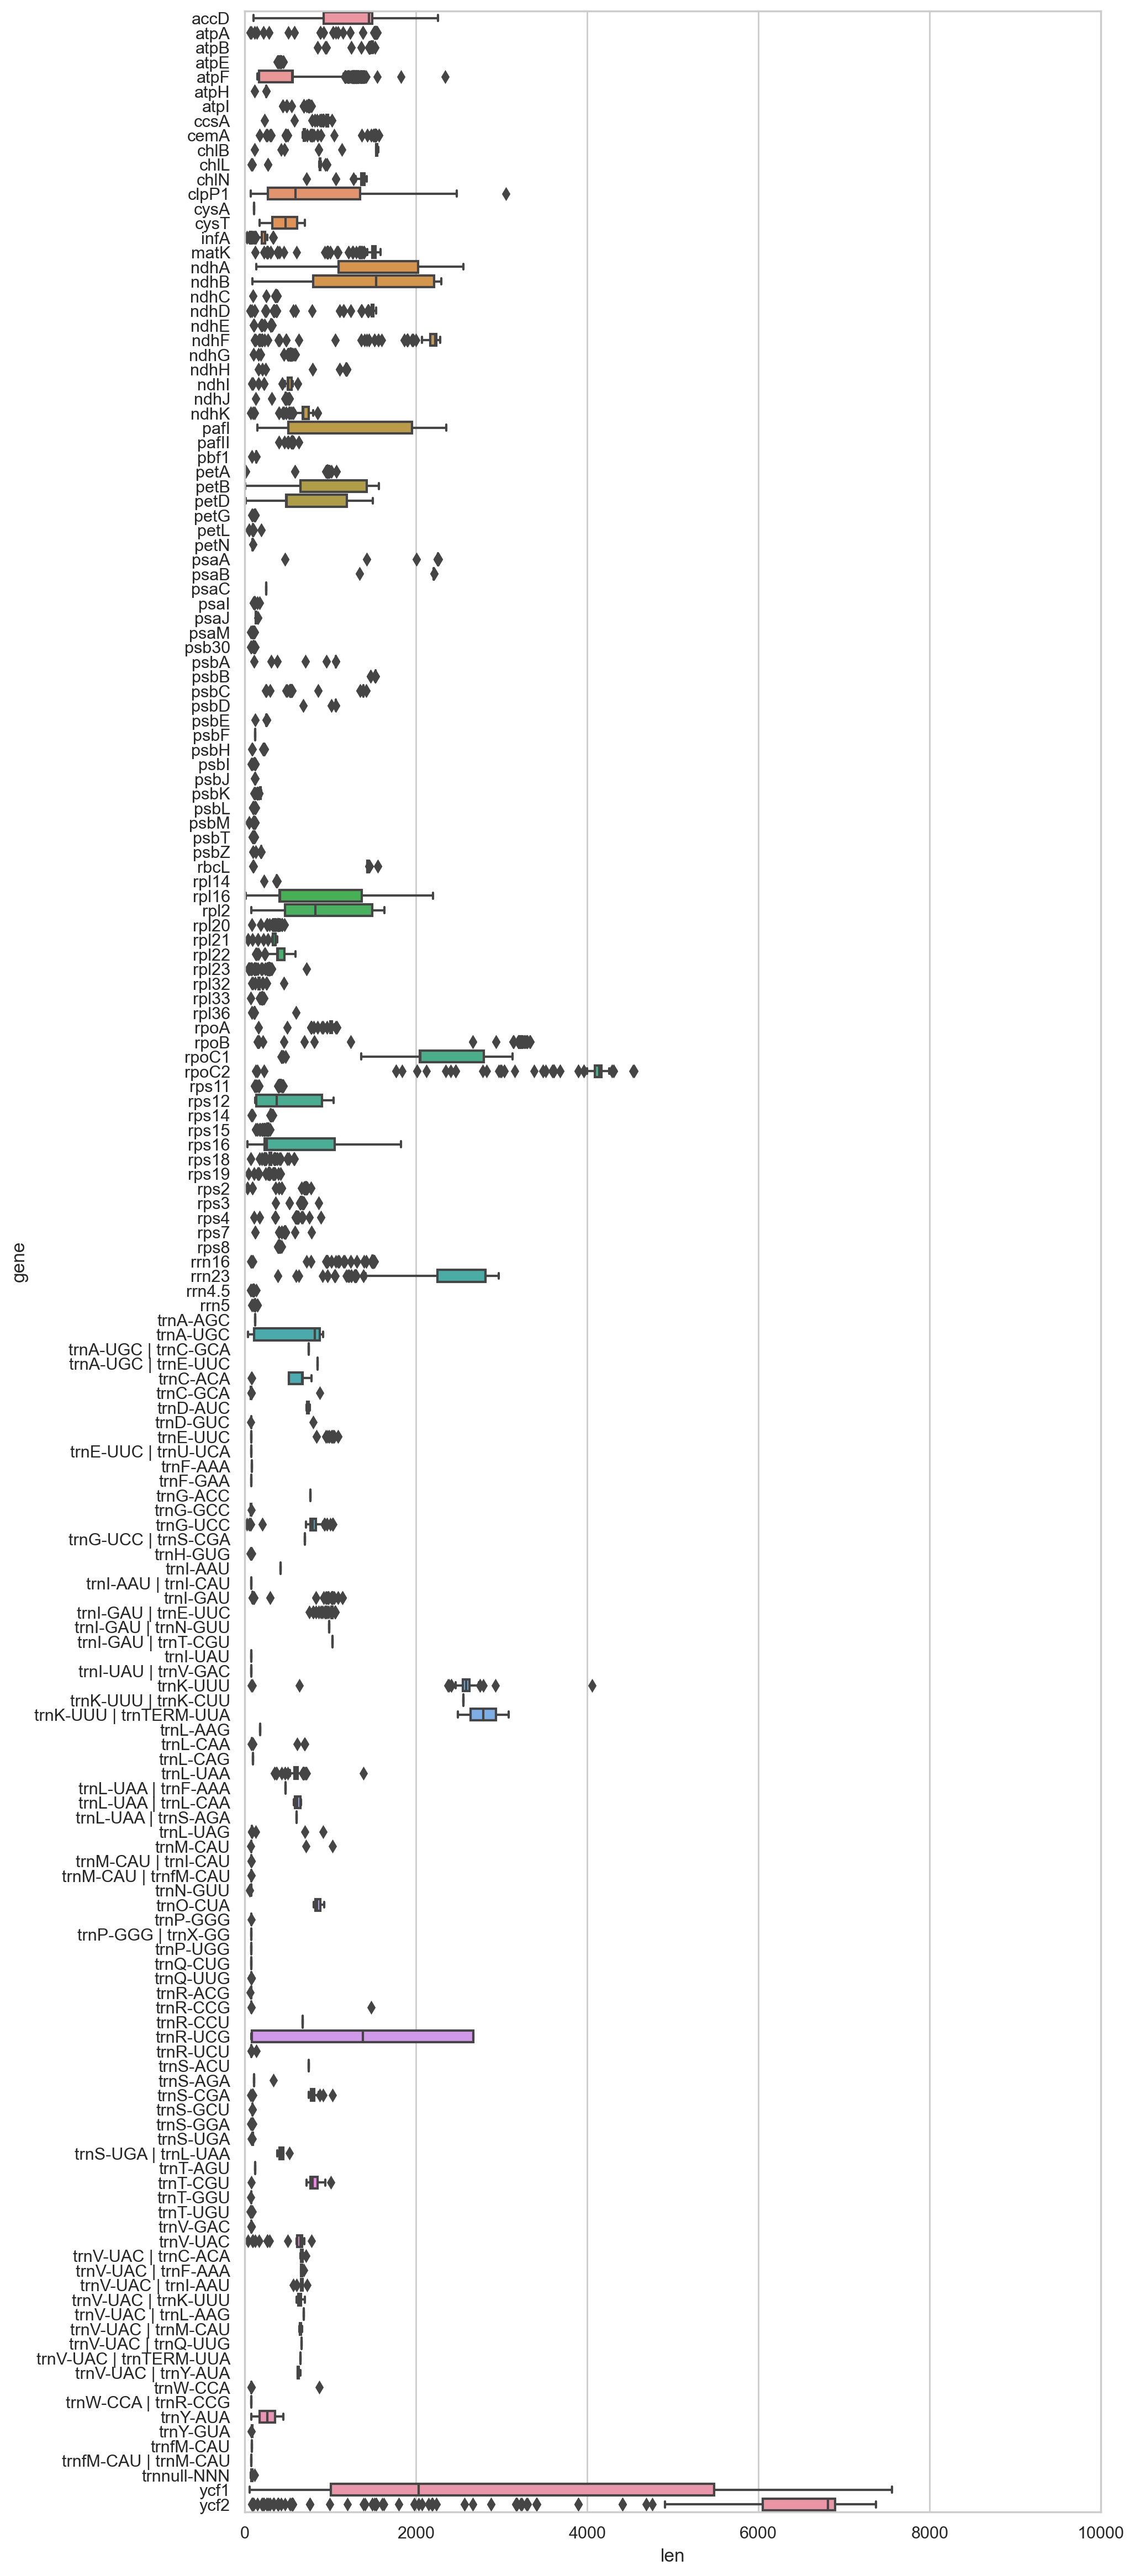

In [99]:
plt.figure(figsize=(10, 30), dpi=200)
sns.set(font_scale=1); sns.set_style("whitegrid")
sns.boxplot(x = 'len', y = 'gene', data = All_feat[All_feat.type.isin(['gene','CDS'])].sort_values('gene'));
plt.xlim(0,10000);

In [ ]:
ref_dir = 'References_gb/'
all_gb_files = [ref_dir + file for file in os.listdir(ref_dir) if file.endswith(".gb")]
# all_gb_files = ['References/NC_003386.1.gb']
print(len(all_gb_files))

Samples_ls = []
for gb_file in all_gb_files:
    # Get features
    seq_df = get_features(gb_file)

    # Get raw feature stats
    sample_stats={'Sample':gb_file.split('/')[-1].replace('.gb','')}
    sample_stats['Nfeatures_raw']=seq_df.shape[0];sample_stats['Ngenes_raw']=seq_df.gene.nunique()
    feat_raw_stats = seq_df.groupby('type').size().sort_values(ascending=False).to_dict()

    # Removing fragments
    seq_df = seq_df[seq_df.gene.str.contains('-fragment')==False]
    # Keeping CDS, rRNA, repeat_region
    accepted_types = ['CDS','rRNA','tRNA'] # Could add repeat_region
    seq_gene = seq_df[seq_df.type=='gene']
    seq_df = seq_df[seq_df.type.isin(accepted_types)]
    seq_gene = seq_gene[seq_gene.gene.isin(seq_df.gene)==False]
    sample_stats['Nfeatures_sel']=seq_df.shape[0];sample_stats['Ngenes_sel']=seq_df.gene.nunique()

    # Removing duplicates
    sample_stats['Nidentical'] = seq_df[seq_df.duplicated(keep=False)].gene.nunique()
    sample_stats['Nduplicates'] = seq_df[seq_df.duplicated(subset='gene',keep=False)].gene.nunique()
    seq_df = seq_df.sort_values('len',ascending=False).groupby('gene').head(1) # Keep longest sequence per gene
    sample_stats['Nfeatures']=seq_df.shape[0];sample_stats['Ngenes']=seq_df.gene.nunique()
    Samples_ls.append(sample_stats)
    print(sample_stats)
    print(feat_raw_stats)
    print(seq_df.groupby('type').size().sort_values(ascending=False).to_dict())

    seq_df = seq_df.sort_values(['type','gene']).reset_index(drop=True)
#     write_fasta(seq_df, sample_stats, fasta_file = gb_file.replace('.gb','_CDS.fasta'))

In [3]:
def write_fasta(seq_df, sample_stats, fasta_file):
    Records = []
    for idx, row in seq_df.iterrows():
        record = SeqRecord( Seq(row.seq), id=sample_stats['Sample'].replace('-','_') + '-' + row.gene.replace('-','_'), 
                description= ';product=' + str(row['product']) + ', location=' + str(row['location']) + ';' )
        Records.append(record)
    SeqIO.write(Records,fasta_file,format='fasta')

In [76]:
Samples_stats = pd.DataFrame(Samples_ls)
Samples_stats.to_csv(ref_dir + 'Ref_stats.csv',index=False)
print('Ngenes:',Samples_stats.Ngenes.quantile([.1,.5,.9]).astype(int).to_dict())
print('Nduplicates:',Samples_stats.Nduplicates.quantile([.1,.5,.9]).astype(int).to_dict())
Samples_stats

Ngenes: {0.1: 113, 0.5: 115, 0.9: 119}
Nduplicates: {0.1: 32, 0.5: 36, 0.9: 47}


,Sample,Nfeatures_raw,Ngenes_raw,Nfeatures_sel,Ngenes_sel,Nidentical,Nduplicates,Nfeatures,Ngenes
0,NC_003386.1,546,129,208,119,0,49,119,119
1,NC_005086.1,467,120,177,115,0,38,115,115
2,NC_009962.1,448,119,169,114,0,32,114,114
3,NC_010323.1,455,121,170,115,0,32,115,115
4,NC_010654.1,390,103,148,96,0,25,96,96
...,...,...,...,...,...,...,...,...,...
119,NC_053912.1,453,120,170,114,0,33,114,114
120,NC_054296.1,457,120,171,114,0,33,114,114
121,NC_054306.1,490,121,181,114,0,38,114,114
122,NC_054357.1,436,108,168,101,0,39,101,101


In [77]:
# Concat .fasta files in a single fasta
all_fa_files = [file for file in os.listdir(ref_dir) if file.endswith("_CDS.fasta")]
print(len(all_fa_files))
all_seqs=[]; ls_id=[]
for ifa in all_fa_files:
    for record in SeqIO.parse(ref_dir + ifa,format='fasta'):
        all_seqs.append(record)
SeqIO.write(all_seqs,ref_dir + 'cpDNA_RefCDS_raw.fasta',format='fasta')
len(all_seqs)

124


14213

In [78]:
# https://blog.finxter.com/how-to-extract-numbers-from-a-string-in-python/
import re
def get_loc(sentence):
    return [float(s) for s in re.findall(r'-?\d+\.?\d*', sentence)]
print(get_loc('join{[126649:127202](-), [125052:125582](-)}	'))

ls_loc=[76120.0, 76234.0, 105286.0, 105518.0, 104729.0, 104829.0]
def len_exons(ls_loc):
    len_exon=0;
    for i in range(0,len(ls_loc),2):
        exon = ls_loc[i:i+2]
        len_exon += max(exon) - min(exon)
    return len_exon
def len_introns(ls_loc):
    len_intron=0;
    if len(ls_loc)/4>0:
        for i in range(1,len(ls_loc),4):
            intron = ls_loc[i:i+2]
            len_intron += max(intron) - min(intron)
    return len_intron
print(len_exons(ls_loc),len_introns(ls_loc))

[126649.0, 127202.0, 125052.0, 125582.0]
446.0 29052.0


In [79]:
ref_stats={}
for record in all_seqs:
    location = record.description.split('location=')[1].split(';')[0]
    ref_stats[record.id]={'len':len(record),'join':'join' in location,'forward':'+' in location,'reverse':'-' in location,
                         'location':location}
ref_stats = pd.DataFrame.from_dict(ref_stats,orient='index').reset_index().rename(columns={'index':'seqid'})
ref_stats[['Accession','gene']]=ref_stats.seqid.str.split('-',expand=True)
ref_stats['ls_loc'] = ref_stats.apply(lambda row: get_loc(row['location']),axis=1)
ref_stats['N_exons'] = ref_stats.apply(lambda row: len(row['ls_loc'])/2,axis=1)
ref_stats['len_exons'] = ref_stats.apply(lambda row: len_exons(row['ls_loc']),axis=1)
ref_stats['len_introns'] = ref_stats.apply(lambda row: len_introns(row['ls_loc']),axis=1)
ref_stats[:2]

,seqid,len,join,forward,reverse,location,Accession,gene,ls_loc,N_exons,len_exons,len_introns
0,NC_003386.1-accD,929,False,True,False,[57912:58841](+),NC_003386.1,accD,"[57912.0, 58841.0]",1.0,929.0,0.0
1,NC_003386.1-atpA,1527,False,False,True,[15691:17218](-),NC_003386.1,atpA,"[15691.0, 17218.0]",1.0,1527.0,0.0


In [82]:
gene_stats = ref_stats.groupby('gene').agg({'len':['min','median','max'],'Accession':['count'],'forward':['sum'],
                            'reverse':['sum'],'join':['sum'],'N_exons':['mean'],'len_exons':['median'],'len_introns':['median','max']})
gene_stats.columns = ['_'.join(col).strip() for col in gene_stats.columns.values]
gene_stats.reset_index().to_csv(ref_dir + 'gene_stats.csv',index=False)
gene_stats[gene_stats.join_sum>5]

,len_min,len_median,len_max,Accession_count,forward_sum,reverse_sum,join_sum,N_exons_mean,len_exons_median,len_introns_median,len_introns_max
gene,,,,,,,,,,,
atpF,424,555.0,576,124,13,111,123,1.991935,555.0,1279.5,2338.0
clpP1,273,591.0,948,121,10,111,106,2.727273,591.0,1160.0,1954.0
ndhA,301,1092.0,1119,116,23,93,113,1.974138,1092.0,2154.0,2553.0
ndhB,311,1533.0,1569,119,46,73,114,1.957983,1533.0,2203.0,2295.0
pafI,228,507.0,543,124,11,113,121,2.943548,507.0,1081.0,1907.0
petB,489,648.0,708,124,116,8,113,1.911290,648.0,781.5,1469.0
petD,479,483.0,539,124,116,8,90,1.725806,483.0,716.0,1226.0
rpl16,9,408.0,492,124,8,116,102,1.822581,408.0,1406.0,2195.0
rpl2,392,825.0,849,123,57,66,117,1.959350,825.0,1285.0,158597.0


In [83]:
print(gene_stats.shape[0],gene_stats.Accession_count.sort_values(ascending=False).to_dict())

144 {'rpoC2': 124, 'rps12': 124, 'atpA': 124, 'rpoC1': 124, 'rpoB': 124, 'rpoA': 124, 'rpl36': 124, 'rpl33': 124, 'rpl20': 124, 'rpl16': 124, 'rpl14': 124, 'rbcL': 124, 'psbZ': 124, 'psbT': 124, 'psbM': 124, 'psbL': 124, 'psbK': 124, 'psbI': 124, 'psbH': 124, 'psbF': 124, 'psbE': 124, 'rps11': 124, 'rps14': 124, 'psbC': 124, 'rps18': 124, 'trnY_GUA': 124, 'trnW_CCA': 124, 'trnR_ACG': 124, 'trnQ_UUG': 124, 'trnM_CAU': 124, 'trnH_GUG': 124, 'trnE_UUC': 124, 'trnD_GUC': 124, 'trnC_GCA': 124, 'rrn5': 124, 'rrn4.5': 124, 'rrn23': 124, 'rrn16': 124, 'rps8': 124, 'rps7': 124, 'rps4': 124, 'rps3': 124, 'rps2': 124, 'rps19': 124, 'psbD': 124, 'ycf2': 124, 'psbB': 124, 'petG': 124, 'ccsA': 124, 'atpI': 124, 'pafI': 124, 'pafII': 124, 'pbf1': 124, 'atpH': 124, 'atpF': 124, 'petA': 124, 'petB': 124, 'petD': 124, 'psbA': 124, 'psaA': 124, 'psaB': 124, 'psaC': 124, 'atpB': 124, 'petN': 124, 'psaI': 124, 'psaJ': 124, 'atpE': 124, 'trnS_GCU': 123, 'trnL_UAG': 123, 'trnF_GAA': 123, 'trnL_UAA': 123, 'tr

In [84]:
# Remove outliers
for idx, record in enumerate(all_seqs):
    if (len(record) > gene_stats.loc[record.id.split('-')[1],:]['len_median']*2) | \
        (len(record) < gene_stats.loc[record.id.split('-')[1],:]['len_median']/2):
        print(record.id,'removed',len(record),gene_stats.loc[record.id.split('-')[1],:]['len_median'])
        del all_seqs[idx]
print(len(all_seqs))

NC_003386.1-cemA removed 1515 690.0
NC_003386.1-trnL_UAA removed 472 85.0
NC_005086.1-trnV_UAC removed 168 74.0
NC_010323.1-infA removed 105 234.0
NC_010654.1-trnS_UGA removed 402 93.0
NC_011156.4-cysT removed 170 474.0
NC_011156.4-ndhB removed 311 1533.0
NC_011156.4-ndhD removed 114 1503.0
NC_011156.4-rpl32 removed 456 171.0
NC_011156.4-rps16 removed 66 261.0
NC_011156.4-trnL_UAA removed 35 85.0
NC_012818.1-cemA removed 1521 690.0
NC_012818.1-clpP1 removed 273 591.0
NC_012818.1-rpoB removed 696 3213.0
NC_016986.1-rpl21 removed 39 360.0
NC_016986.1-rpl23 removed 81 282.0
NC_016986.1-trnS_AGA removed 336 108.0
NC_017006.1-cemA removed 1518 690.0
NC_017006.1-trnG_UCC removed 23 71.0
NC_020146.1-cemA removed 1428 690.0
NC_020146.1-rpl16 removed 81 408.0
NC_020146.1-ycf2 removed 3409 6862.5
NC_020146.1-trnL_UAA removed 345 85.0
NC_022137.1-cemA removed 1533 690.0
NC_022137.1-rps11 removed 168 417.0
NC_024157.1-cemA removed 1521 690.0
NC_024157.1-trnI_GAU removed 295 88.0
NC_024158.1-cemA r

In [86]:
ref_stats={}
for record in all_seqs:
    location = record.description.split('location=')[1].split(';')[0]
    ref_stats[record.id]={'len':len(record),'join':'join' in location,'forward':'+' in location,'reverse':'-' in location,
                         'location':location}
ref_stats = pd.DataFrame.from_dict(ref_stats,orient='index').reset_index().rename(columns={'index':'seqid'})
ref_stats[['Accession','gene']]=ref_stats.seqid.str.split('-',expand=True)
ref_stats['ls_loc'] = ref_stats.apply(lambda row: get_loc(row['location']),axis=1)
ref_stats['N_exons'] = ref_stats.apply(lambda row: len(row['ls_loc'])/2,axis=1)
gene_stats = ref_stats.groupby('gene').agg({'len':['min','median','max'],'Accession':['count'],
                                           'forward':['sum'],'reverse':['sum'],'join':['sum'],'N_exons':['mean']})
gene_stats.columns = ['_'.join(col).strip() for col in gene_stats.columns.values]
gene_stats.reset_index().to_csv(ref_dir + 'gene_stats.csv',index=False)
print(gene_stats.shape[0])
gene_stats[:2]

144


,len_min,len_median,len_max,Accession_count,forward_sum,reverse_sum,join_sum,N_exons_mean
gene,,,,,,,,
accD,746,1476.0,1893,112,101,11,1,1.008929
atpA,882,1524.0,1545,124,14,110,0,1.000000


In [87]:
gene_stats_clean = gene_stats[gene_stats.Accession_count>(gene_stats.Accession_count.max()*0.33)].astype({'len_median':'int'})
gene_stats_clean['N_exons_mean'] = gene_stats_clean['N_exons_mean'].round(2)
gene_stats_clean.reset_index().to_csv(ref_dir + 'cleaned_gene_stats.csv',index=False)
print(gene_stats_clean.shape[0],gene_stats_clean.Accession_count.sort_values(ascending=False).to_dict())
gene_stats_clean

113 {'psaI': 124, 'psaB': 124, 'rps19': 124, 'psaJ': 124, 'psbA': 124, 'psbB': 124, 'psbC': 124, 'psbD': 124, 'psbE': 124, 'psbF': 124, 'psbH': 124, 'psbI': 124, 'psbK': 124, 'psbL': 124, 'psbM': 124, 'psbT': 124, 'psbZ': 124, 'rbcL': 124, 'rpl14': 124, 'rrn4.5': 124, 'rrn23': 124, 'rpl20': 124, 'atpA': 124, 'rrn16': 124, 'rps8': 124, 'rpoA': 124, 'rpoC1': 124, 'rpoC2': 124, 'rps4': 124, 'rps14': 124, 'rps3': 124, 'psaC': 124, 'rps18': 124, 'psaA': 124, 'trnE_UUC': 124, 'atpB': 124, 'atpE': 124, 'atpF': 124, 'atpH': 124, 'atpI': 124, 'ccsA': 124, 'trnY_GUA': 124, 'trnW_CCA': 124, 'trnR_ACG': 124, 'petN': 124, 'trnM_CAU': 124, 'trnQ_UUG': 124, 'pbf1': 124, 'petG': 124, 'trnD_GUC': 124, 'trnC_GCA': 124, 'petD': 124, 'petB': 124, 'rrn5': 124, 'pafII': 124, 'trnF_GAA': 123, 'rps2': 123, 'petL': 123, 'rps12': 123, 'petA': 123, 'rps7': 123, 'rpl33': 123, 'rpl36': 123, 'trnL_UAG': 123, 'trnS_GCU': 123, 'trnR_UCU': 123, 'trnP_UGG': 123, 'trnN_GUU': 123, 'psbJ': 123, 'trnS_GGA': 122, 'rpl22': 1

,len_min,len_median,len_max,Accession_count,forward_sum,reverse_sum,join_sum,N_exons_mean
gene,,,,,,,,
accD,746,1476,1893,112,101,11,1,1.01
atpA,882,1524,1545,124,14,110,0,1.00
atpB,849,1497,1520,124,12,112,0,1.00
atpE,396,402,450,124,13,111,0,1.00
atpF,424,555,576,124,13,111,123,1.99
...,...,...,...,...,...,...,...,...
trnV_UAC,37,74,119,113,9,104,104,1.92
trnW_CCA,74,74,76,124,11,113,1,1.01
trnY_GUA,82,86,89,124,16,108,0,1.00


In [88]:
# Remove genes not kept
for idx, record in enumerate(all_seqs):
    if (record.id.split('-')[1] not in gene_stats_clean.index):
        print(record.id,'removed',end=', ')
        del all_seqs[idx]
print(len(all_seqs))

psaM removed, rpl21 removed, trnF_AAA removed, trnP_GGG removed, trnR_CCG removed, trnT_CGU removed, psb30 removed, trnS_AGA removed, psb30 removed, trnG_ACC removed, trnP_GGG removed, trnR_CCG removed, chlB removed, chlN removed, psaM removed, trnP_GGG removed, trnR_CCG removed, trnY_AUA removed, trnfM_CAU removed, chlB removed, chlN removed, psaM removed, rpl21 removed, trnP_GGG removed, trnR_UCG removed, trnT_AGU removed, chlB removed, chlN removed, psaM removed, trnP_GGG removed, trnR_CCG removed, trnY_AUA removed, trnfM_CAU removed, chlB removed, chlN removed, psaM removed, rpl21 removed, trnP_GGG removed, trnR_CCG removed, chlB removed, chlN removed, psaM removed, rpl21 removed, trnD_AUC removed, trnP_GGG removed, trnR_CCG removed, chlB removed, chlN removed, psaM removed, rpl21 removed, trnA_AGC removed, trnP_GGG removed, chlB removed, chlN removed, psaM removed, rpl21 removed, trnK_CUU removed, trnP_GGG removed, trnR_CCG removed, trnT_CGU removed, chlB removed, chlN removed, ps

In [96]:
# Remove duplicates
ls_id = []
for idx, record in enumerate(all_seqs):
    if record.id in ls_id:
        print(record.id,'removed',end=', ')
        del all_seqs[idx]
    else:
        ls_id.append(record.id)
print(len(all_seqs))

13632


In [97]:
SeqIO.write(all_seqs,ref_dir + 'cpDNA_RefCDS.fasta',format='fasta')

13632

In [94]:
Multi_Exons = gene_stats_clean[(gene_stats_clean.N_exons_mean>1.33)]
print(Multi_Exons.index)
Multi_Exons

Index(['atpF', 'clpP1', 'ndhA', 'ndhB', 'pafI', 'petB', 'petD', 'rpl16',
       'rpl2', 'rpoC1', 'rps12', 'rps16', 'trnC_ACA', 'trnG_UCC', 'trnK_UUU',
       'trnL_UAA', 'trnS_CGA', 'trnV_UAC'],
      dtype='object', name='gene')


,len_min,len_median,len_max,Accession_count,forward_sum,reverse_sum,join_sum,N_exons_mean
gene,,,,,,,,
atpF,424,555,576,124,13,111,123,1.99
clpP1,323,591,948,120,10,110,106,2.74
ndhA,574,1092,1119,114,22,92,113,1.99
ndhB,773,1533,1569,116,44,72,113,1.97
pafI,283,507,543,121,11,110,121,2.99
petB,489,648,708,124,116,8,113,1.91
petD,479,483,539,124,116,8,90,1.73
rpl16,392,408,492,120,7,113,102,1.85
rpl2,462,825,849,122,57,65,117,1.97


Run 'makeblastdb -in References/cpDNA_RefCDS.fasta -dbtype nucl -parse_seqids'

blastn  -query ../GetOrganelles/PAFTOL/fasta_pt/PAFTOL_016977_pt.fasta  -db References/cpDNA_RefGenes.fasta -outfmt "6 qseqid sseqid pident length mismatch gapopen qlen qstart qend slen sstart send evalue bitscore qseq" -out PAFTOL_016977.blast -max_target_seqs 5 -num_threads 1 -gapopen 0 -gapextend 0

python targets_from_blast.py PAFTOL_016977.blast PAFTOL_016977_ptGenes.fasta